In [70]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [76]:
df_states = gpd.read_file('Data/us-states.json')
df_fires = gpd.read_file('Data/mtbs_fire_locations.geojson')

In [ ]:
df_states

In [68]:
df_western_us = df_states[df_states['name'].isin(['California', 'Oregon', 'Washington', 'Nevada', 'Arizona', 'Idaho', 'Montana', 'Utah', 'Wyoming', 'Colorado', 'New Mexico'])]

<AxesSubplot:>

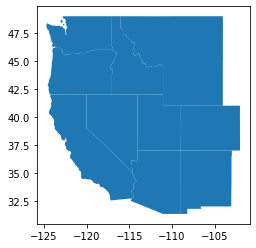

In [74]:
df_western_us.plot()

In [79]:
gpd.GeoDataFrame(df_western_us).to_file('Data/western_us.geojson', driver='GeoJSON')

/home/jake/miniconda3/envs/rstools/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [ ]:
df_fires["Ig_Date"] = pd.to_datetime(df_fires["Ig_Date"])

In [ ]:
def timestamp_to_year_part(df):
    date = df["Ig_Date"][0]
    year = int(date.strftime("%Y"))
    print('{} / {}'.format(date,year))
    df.year.values[:] = year
    return df

In [77]:
df_fires

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Ig_Date,Pre_ID,Post_ID,Perim_ID,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry
0,CA3370911761819840126,None,MODJESKA,Wildfire,10005362,MTBS,Extended (SS),1266,33.708,-117.639,1984-01-26,None,504003719840623,504003719840323,-9999,-9999,9999,9999,150,-70,-170,None,0,POINT (-117.63783 33.71076)
1,OK3698209465619840221,None,RESIDENT,Wildfire,4539,MTBS,Initial (SS),1048,36.982,-94.656,1984-02-21,None,502603419840418,None,-9999,-9999,9999,9999,-50,-147,-185,None,1,POINT (-94.65552 36.98169)
2,TX3028409841719840226,None,STEWAIT,Wildfire,10003829,MTBS,Initial (SS),3696,30.373,-98.406,1984-02-26,None,502703919840409,None,-9999,-9999,9999,9999,100,-9999,-9999,None,2,POINT (-98.40677 30.37413)
3,CA3607412018819840329,None,FK 1817,Wildfire,4557,MTBS,Initial (SS),1462,36.074,-120.188,1984-03-29,None,504203519840707,None,-9999,-9999,9999,9999,-65,-280,-9999,Single scene assessment,3,POINT (-120.18760 36.07389)
4,TX3635010276719840329,None,MORRIS,Wildfire,10003855,MTBS,Initial (SS),1110,36.368,-102.754,1984-03-29,None,503103519840608,None,-9999,-9999,9999,9999,200,-9999,-9999,None,4,POINT (-102.75164 36.36683)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29528,UT4113611287920210330,1A6EF06F-0508-42FE-B365-85850E42EBCC,TTU,Wildfire,10021889,MTBS,Initial,5879,41.119,-112.852,2021-03-30,B12TUL20210316_30m,A12TUL20210410_30m,None,21,15,-970,-150,50,9999,9999,None,29528,POINT (-112.85215 41.11848)
29529,VA3699808145920210420,None,UNNAMED,Prescribed Fire,10021929,MTBS,Initial,1460,36.998,-81.457,2021-04-20,B17SMA20210406_30m,B17SMA20210426_30m,None,-41,11,-970,-150,15,9999,9999,None,29529,POINT (-81.45338 37.00064)
29530,WA4637511716520210707,236951C4-0149-4523-AE60-6AF68FD053D9,SILCOTT,Wildfire,10021631,MTBS,Initial,8864,46.354,-117.178,2021-07-07,A11TMM20210705_30m,B11TMM20210713_30m,None,-7,13,-970,-150,45,9999,9999,None,29530,POINT (-117.17916 46.35426)
29531,WA4649011720020210722,E34E42E3-4F4C-4634-A37B-986191EE9F77,STEPTOE CANYON,Wildfire,10021620,MTBS,Initial,2758,46.481,-117.202,2021-07-22,A11TMM20200829_30m,B11TMM20210819_30m,None,-20,38,-970,-150,30,380,560,None,29531,POINT (-117.19949 46.48195)


In [78]:
date_mask_1985 = (df_fires["Ig_Date"] >= '1985-01-01') & (df_fires["Ig_Date"] <= '1985-12-31')
date_mask_2015 = (df_fires["Ig_Date"] >= '2015-01-01') & (df_fires["Ig_Date"] <= '2015-12-31')
fire_type_mask = (df_fires["Incid_Type"] != 'Prescribed Fire')
fire_size_mask = (df_fires["BurnBndAc"] > 0.0)
fire_location_mask = (df_fires["geometry"].within(df_western_us.unary_union))

In [80]:
fires_1985 = df_fires[date_mask_1985 & fire_type_mask & fire_size_mask & fire_location_mask]
fires_2015 = df_fires[date_mask_2015 & fire_type_mask & fire_size_mask & fire_location_mask]

In [81]:
gpd.GeoDataFrame(fires_1985).to_file("Data/fires_1985.geojson", driver='GeoJSON')
gpd.GeoDataFrame(fires_2015).to_file("Data/fires_2015.geojson", driver='GeoJSON')

/home/jake/miniconda3/envs/rstools/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/jake/miniconda3/envs/rstools/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [ ]:
df_fires.assign(year=np.int32(0))
df_fires = df_fires.apply(timestamp_to_year_part, axis=1)

In [82]:
fires_1985["BurnBndAc"].describe()

count       302.000000
mean       7871.122517
std       13735.806608
min        1002.000000
25%        1622.250000
50%        3075.500000
75%        7720.250000
max      126854.000000
Name: BurnBndAc, dtype: float64

In [ ]:
fires_2015["BurnBndAc"].describe()